# Titanic - Machine Learning from Disaster

This competiton is to use machine larning to create a model that predicts which passenger survived the Titanic shipwreck

# Step 1: Import all necesary libraries

In [1]:
# import necessary libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Step 2: Read and Understand the Dataset

In [2]:
# reading the csv files
train_df = pd.read_csv("train(2).csv")
test_df = pd.read_csv("test(1).csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [3]:
#  previwing the first five row in the train dataset
print("Preview of the first five  train dataset")
display(train_df.tail(5))

Preview of the first five  train dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#  previwing the first five row in the test dataset
print("Preview of the first five  test dataset")
display(test_df.head(5))

Preview of the first five  test dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#  previwing the first five row in the gender submission dataset
print("Preview of the first five  gender submission dataset")
display(gender_submission.head(5))


Preview of the first five  gender submission dataset


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
# let's check the train dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# checking for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.columns
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Step 3: Data Preprocessing 

In [18]:
def processed_data(data):
    # filling in the missing values
    avg_age = data["Age"].mean().round(1)
    data["Age"].replace(np.nan, avg_age, inplace=True)
    
    # filling in the missing values
    data["Cabin"].fillna("B96 B98", inplace=True)
    # converting categorical ccolumns into numerical col
    cate = ['Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    # Label Encoder conversion
    le = LabelEncoder()
    data["Sex"] = le.fit_transform(data["Sex"])
    data["Ticket"] = le.fit_transform(data["Ticket"])
    data["Fare"] = le.fit_transform(data["Fare"])
    data["Cabin"] = le.fit_transform(data["Cabin"])
    data["Embarked"] = le.fit_transform(data["Embarked"])
    
    # drop name column
    data = data.drop(["Name"], axis=1)

    
   
    return data

In [19]:
processed_train = processed_data(train_df)
processed_test = processed_data(test_df)

# Step 4: Model Development
For this competition we were told to use the **Random Forest Model**

# Random Forest

In [20]:
# defining the predictor and traget variable
X = processed_train.drop(columns="Survived")
y = processed_train[["Survived"]]

In [21]:
# training the variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(801, 10)

In [22]:
# defining the random forest classifer
rf = RandomForestClassifier()

# fitting the model
rf_model = rf.fit(X_train, y_train)

# predicting the fitted model model
rf_pred = rf.predict(X_test)

# Step 5: Model Evaluation
For this competition we were told to use the accuracy score to evaluate the model

In [23]:
# accuracy score
acc_score = accuracy_score(y_test, rf_pred)
print(f"The Accuracy score is {acc_score:.2f}")

# error rate of the model
error = 1 - acc_score
print(f"The error rate of the random forest model is {error:.2f}")

The Accuracy score is 0.82
The error rate of the random forest model is 0.18


In [24]:
# get the confusion matrix for the model
cm = confusion_matrix(y_test, rf_pred)

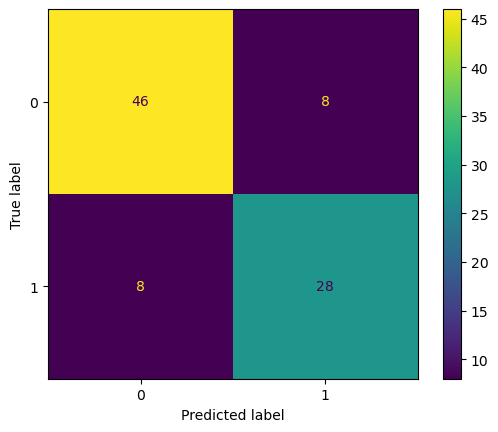

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Step 6: Improvement of the model
I used the grid search to improve the model by finding the best parameters for the model 

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["auto", "sqrt"]
    
        }
my_rf_model = GridSearchCV(rf, param_grid,n_jobs=-1,verbose=2,cv=5)
my_rf_model.fit(X_train, y_train)
print(my_rf_model.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [29]:
# fitting the model by setting the best parameter
lf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=200)

# fitting the model
rf_model = rf.fit(X_train, y_train)

# predicting the model
rf_pred2 = rf.predict(X_test)


In [30]:
# accuracy score
acc_score = accuracy_score(y_test, rf_pred2)
print(f"The Accuracy score is {acc_score}")

# error rate of the model
error = 1 - acc_score
print(f"The error rate of the random forest model is {error}")

The Accuracy score is 0.8555555555555555
The error rate of the random forest model is 0.1444444444444445


so, we can see the difference, the error rate with the best paramter is more lower than the previous

In [31]:
# get the confusion matrix for the model
cm = confusion_matrix(y_test, rf_pred2)

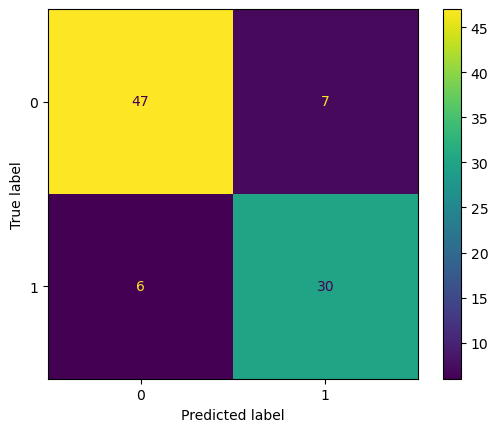

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Step 7: Predicting the Model using the test dataset

In [33]:
# Get the predicted result for the test Data
test_df.Survived = rf_model.predict(processed_test)

# Step 8: Creating a DataFrame for the predicted data

In [34]:
# creating my submission file
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],
            "Survived": test_df.Survived            

                          })
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Step 9: Saving my Submission File

In [35]:
submission.to_csv("submission1.csv", index=False)

In [37]:
features = pd.DataFrame(rf.feature_importances_, index=X.columns)

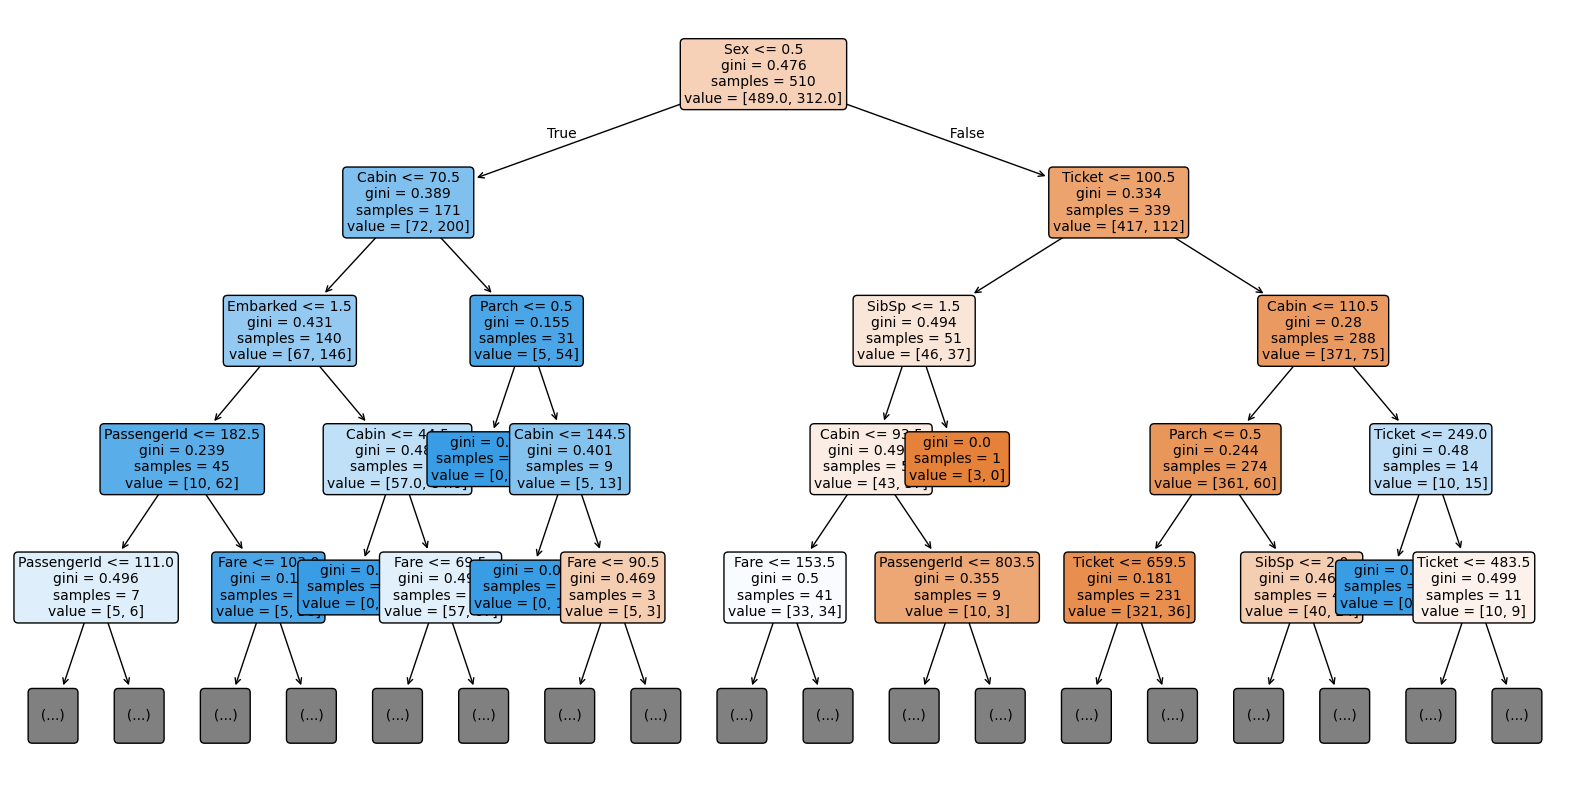

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names = X.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()
